In [3]:
import pandas as pd

# Reading in the csv file to a pandas dataframe.
text_results = pd.read_csv("results.csv", sep='\t', decimal=",")
text_results.drop(text_results.columns[0], axis='columns', inplace=True)
text_results.drop(83, axis='index', inplace=True)

text_results.info()
print("shape:\t", text_results.shape)
print("------------")
print("-----------\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Text                   83 non-null     object 
 1   Types                  83 non-null     int64  
 2   Tokens                 83 non-null     int64  
 3   TTR                    83 non-null     float64
 4   h-Point                83 non-null     float64
 5   Entropy                83 non-null     float64
 6   Average Tokens Length  83 non-null     float64
 7   R1                     83 non-null     float64
 8   Λ (Lambda)             83 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 6.0+ KB
shape:	 (83, 9)
------------
-----------



In [4]:
print(text_results.dtypes)

Text                      object
Types                      int64
Tokens                     int64
TTR                      float64
h-Point                  float64
Entropy                  float64
Average Tokens Length    float64
R1                       float64
Λ (Lambda)               float64
dtype: object


In [5]:
text_results

,Text,Types,Tokens,TTR,h-Point,Entropy,Average Tokens Length,R1,Λ (Lambda)
0,n_1,198,286,0.692308,5.000000,7.295401,5.461538,0.910839,1.755582
1,n_2,197,300,0.656667,6.500000,7.196172,4.910000,0.890417,1.662740
2,n_3,189,300,0.630000,7.000000,7.082131,4.936667,0.868333,1.604331
3,n_4,204,299,0.682274,7.000000,7.298109,4.969900,0.894649,1.711673
4,n_5,201,300,0.670000,6.000000,7.271903,5.346667,0.896667,1.701143
...,...,...,...,...,...,...,...,...,...
78,n_79,205,300,0.683333,5.500000,7.267504,5.386667,0.890417,1.730751
79,n_80,193,300,0.643333,6.000000,7.190152,4.673333,0.893333,1.638507
80,n_81,175,300,0.583333,6.500000,6.982434,4.796667,0.880417,1.511510
81,n_82,189,300,0.630000,5.666667,7.054985,4.823333,0.863519,1.637998


Ζητάμε τα αποτελέσματά μας να φιλτραριστούν, ώστε να κρατήσουμε τα επιθυμητά: 'Entropy', 'TTR', 'Average Tokens Length' και τέλος το 'text' για να μπορούμε να βλέπουμε την αντιστοιχία στα κείμενα.

In [6]:
scores = text_results.filter(regex='Text|Ent*|TTR|ngth$', axis=1)

print(scores.shape)
scores

(83, 4)


,Text,TTR,Entropy,Average Tokens Length
0,n_1,0.692308,7.295401,5.461538
1,n_2,0.656667,7.196172,4.910000
2,n_3,0.630000,7.082131,4.936667
3,n_4,0.682274,7.298109,4.969900
4,n_5,0.670000,7.271903,5.346667
...,...,...,...,...
78,n_79,0.683333,7.267504,5.386667
79,n_80,0.643333,7.190152,4.673333
80,n_81,0.583333,6.982434,4.796667
81,n_82,0.630000,7.054985,4.823333


Αλλάξαμε τον τρόπο αφαίρεσης των outliers συγκριτικά με την προηγούμενη εργασία. Σε αυτή υπολογίζουμε τα κατώτερα όρια και ανώτερα αντίστοιχα του κάθε δείκτη και ό,τι δεδομένα έχουν τιμές κατώτερες και ανώτερες αυτών αντίστοιχα τις αφαιρούμε. Τα κατώτερα όρια τα υπολογίζουμε αφαιρώντας απο το πρώτο τεταρτημόριο 1.5 επί IQR (απόσταση μεταξύ του 1ου τεταρτημορίου και του 3ου τεταρτημορίου). Αντίστοιχα, τα ανώτερα όρια τα υπολογίζουμε προσθέτοντας αντι να αφαιρέσουμε το παραπάνω γινόμενο.

In [7]:
from scipy import stats

import numpy as np
 
TTR_q1 = scores['TTR'].quantile(0.25)
TTR_q3 = scores['TTR'].quantile(0.75)
TTR_iqr = TTR_q3 - TTR_q1
TTR_lower_bound = TTR_q1 - 1.5 * TTR_iqr
TTR_upper_bound = TTR_q3 + 1.5 * TTR_iqr
filtered_scores = scores[(scores['TTR'] >= TTR_lower_bound) & (scores['TTR'] <= TTR_upper_bound)]
#print(filtered_scores)
#print(filtered_scores.shape)
outliers = scores.loc[(scores['TTR'] < TTR_lower_bound) | (scores['TTR'] > TTR_upper_bound)]
text_with_outliers = outliers['Text']
print(text_with_outliers)


54    n_55
74    n_75
Name: Text, dtype: object


In [8]:

Entropy_q1 = scores['Entropy'].quantile(0.25)
Entropy_q3 = scores['Entropy'].quantile(0.75)
Entropy_iqr = Entropy_q3 - Entropy_q1
Entropy_lower_bound = Entropy_q1 - 1.5 * Entropy_iqr
Entropy_upper_bound = Entropy_q3 + 1.5 * Entropy_iqr
filtered_scores = filtered_scores[(filtered_scores['Entropy'] >= Entropy_lower_bound) & (filtered_scores['Entropy'] <= Entropy_upper_bound)]
print(filtered_scores)
print(filtered_scores.shape)


    Text       TTR   Entropy  Average Tokens Length
0    n_1  0.692308  7.295401               5.461538
1    n_2  0.656667  7.196172               4.910000
2    n_3  0.630000  7.082131               4.936667
3    n_4  0.682274  7.298109               4.969900
4    n_5  0.670000  7.271903               5.346667
..   ...       ...       ...                    ...
77  n_78  0.610000  6.916267               4.793333
78  n_79  0.683333  7.267504               5.386667
79  n_80  0.643333  7.190152               4.673333
80  n_81  0.583333  6.982434               4.796667
81  n_82  0.630000  7.054985               4.823333

[80 rows x 4 columns]
(80, 4)


In [9]:

ATL_q1 = scores['Average Tokens Length'].quantile(0.25)
ATL_q3 = scores['Average Tokens Length'].quantile(0.75)
ATL_iqr = ATL_q3 - ATL_q1
ATL_lower_bound = ATL_q1 - 1.5 * ATL_iqr
ATL_upper_bound = ATL_q3 + 1.5 * ATL_iqr
filtered_scores = filtered_scores[(filtered_scores['Average Tokens Length'] >= ATL_lower_bound) & (filtered_scores['Average Tokens Length'] <= ATL_upper_bound)]
print(filtered_scores)
print(filtered_scores.shape)
outliers = scores.loc[(scores['Average Tokens Length'] < ATL_lower_bound) | (scores['Average Tokens Length'] > ATL_upper_bound)]
text_with_outliers = outliers['Text']
print(text_with_outliers)
filtered_scores.to_csv("filtered_scores3.csv", sep='\t', decimal=',')


    Text       TTR   Entropy  Average Tokens Length
1    n_2  0.656667  7.196172               4.910000
2    n_3  0.630000  7.082131               4.936667
3    n_4  0.682274  7.298109               4.969900
4    n_5  0.670000  7.271903               5.346667
5    n_6  0.656667  7.123740               5.113333
..   ...       ...       ...                    ...
77  n_78  0.610000  6.916267               4.793333
78  n_79  0.683333  7.267504               5.386667
79  n_80  0.643333  7.190152               4.673333
80  n_81  0.583333  6.982434               4.796667
81  n_82  0.630000  7.054985               4.823333

[78 rows x 4 columns]
(78, 4)
0      n_1
75    n_76
Name: Text, dtype: object


In [12]:
filtered_scores[0:50].describe(include='all')

,Text,TTR,Entropy,Average Tokens Length
count,50,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN
top,n_2,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,0.643256,7.162248,5.004488
std,NaN,0.027498,0.093708,0.165026
min,NaN,0.566667,6.948142,4.653333
25%,NaN,0.626667,7.114753,4.905000
50%,NaN,0.646667,7.161220,4.979950
75%,NaN,0.660000,7.235845,5.078939


Βρίσκουμε το διάστημα εμπιστοσύνης με την βοήθεια της μεθόδου st.norm.interval(), που χρησιμοποιεί την κανονική κατανομή. Απο τον κώδικα υπολογίζεται ο μέσος όρος των δεικτών και η τυπική απόκλιση. Κατόπιν, αφαιρεί απο τον μέσο όρο του δείγματος (κατωτατο όριο) / προσθέτει (ανώτατο όριο) το γινόμενο του z (1.96 για 95% βαθμό αυτοπεποίθησης) με το πηλίκο της τυπικής απόκλισης και την τετραγωνική ρίζα του μεγέθους του δείγματος 

In [13]:
import numpy as np
from scipy.stats import norm
import scipy.stats as st
CI1 = filtered_scores["TTR"][0:50]
CI2 = filtered_scores["Entropy"][0:50]
CI3 = filtered_scores["Average Tokens Length"][0:50]


print("95% N distr. confidence interval of CI1", st.norm.interval(alpha=0.9545, loc=np.mean(CI1 ), scale=st.sem(CI1 )))
print("95% N distr. confidence interval of CI2", st.norm.interval(alpha=0.9545, loc=np.mean(CI2), scale=st.sem(CI2)))
print("95% N distr. confidence interval of CI3", st.norm.interval(alpha=0.9545, loc=np.mean(CI3), scale=st.sem(CI3)))


95% N distr. confidence interval of CI1 (0.6354782178904571, 0.651033382109543)
95% N distr. confidence interval of CI2 (7.135743286037696, 7.188752513962305)
95% N distr. confidence interval of CI3 (4.957811676722029, 5.05116480327797)


C:\Users\Konstantina\AppData\Local\Temp\ipykernel_2992\3375525032.py:9: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print("95% N distr. confidence interval of CI1", st.norm.interval(alpha=0.9545, loc=np.mean(CI1 ), scale=st.sem(CI1 )))
C:\Users\Konstantina\AppData\Local\Temp\ipykernel_2992\3375525032.py:10: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print("95% N distr. confidence interval of CI2", st.norm.interval(alpha=0.9545, loc=np.mean(CI2), scale=st.sem(CI2)))
C:\Users\Konstantina\AppData\Local\Temp\ipykernel_2992\3375525032.py:11: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional arg

Για την πραγμάτοποίηση των t-tests, που επιβεβαιώνουν την μηδενική μας υπόθεση, δηλαδή οτι ο μέσος όρος του δείγματος είναι αυτός που πήραμε απο τον πίνακα τιμών, επιλέξαμε να κάνουμε ένα left tailed και ένα right tailed test για κάθε ένα δείκτη. Ορίσαμε την μηδενική υπόθεση (εκάστοτε μέσος όρος απο τον πίνακα), το επίπεδο στατιστικής σημαντικότητας α (=0.05), τον βαθμό ελευθερίας (d.o.f.,το μήκος του συνόλου δεδομένων -1), το t critical απο τον πίνακα (1,96), το t που ισοδυναμεί με τον μέσο του δείγματος πλην τον μέσο της μηδενικής υποθεσης μας (για left tailed:H0mean - mean του δείγματος) δια την τυπική απόκλιση. Έτσι, όταν το t είναι μεγαλύτερο απο το t critical δεχόμαστε την μηδενική υπόθεση, καθώς αυτό ορίζει την περιοχή αποδοχής. Στο διάγραμμα βλέπουμε την γραμμή (κόκκινη) που συμβολίζει το t να είναι πιο αριστερή και έτσι δεχόμαστε την μηδενική υπόθεση αντίθετα στο left tailed test την θέλουμε απο την δεξιά πλευρά. Με αυτόν τον τρόπο έχουμε εξετασει και τις δύο πλευρές της κατανομής μας για να δούμε αν τα απολεσματα μας είναι μέσα στα όρια, ώστε να δεχτούμε την μηδενική υπόθεση. 

sample mean:	 0.6432558
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: -5.14299281136013e-05

cannot reject H0


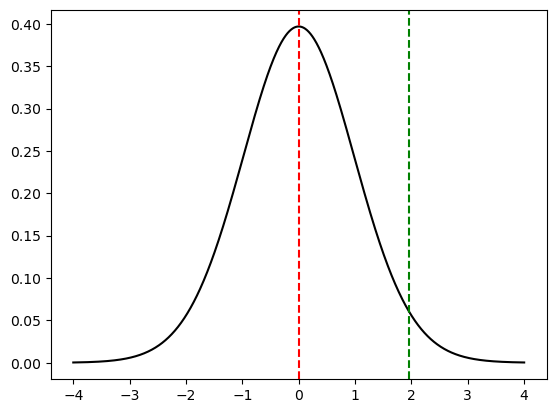

In [14]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import math 

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['TTR']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

#H1: μ > h0value one-tail, right-tail t-test
h0value = 0.643256
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = 1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (m-h0value)/se
print("t-statistic:", t)
print()


if t_crit<t:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 0.6432558
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: 5.14299281136013e-05

cannot reject H0


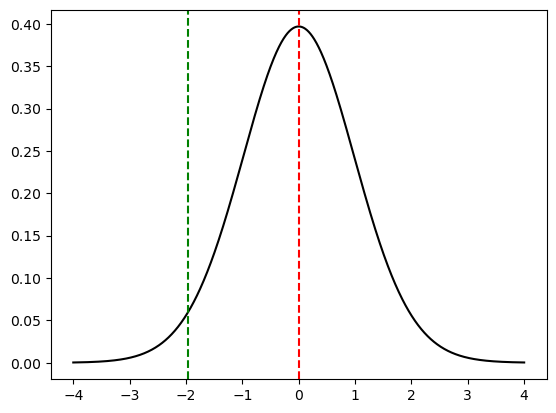

In [15]:

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['TTR']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

h0value =  0.643256
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = -1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (h0value-m)/se
print("t-statistic:", t)
print()


if t < t_crit:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

Με τον ίδιο τρόπο,για να απορριφθεί η μηδενική υπόθεση και να δεχτούμε την εναλλακτική, κάνουμε ενα t test (left tailed)και αλλάζουμε την τιμή της μηδενικής υπόθεσης με μια άλλη μικρότερη, ώστε τελικά το t που προκύπτει απο αυτή την τιμή να είναι μεγαλύτερο απο το t critic. Αντίστοιχα, σε ένα right tailed test θα κάνουμε την μηδενική υπόθεση μεγαλύτερη.

sample mean:	 0.6432558
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: -3.4498681478330813

can reject H0


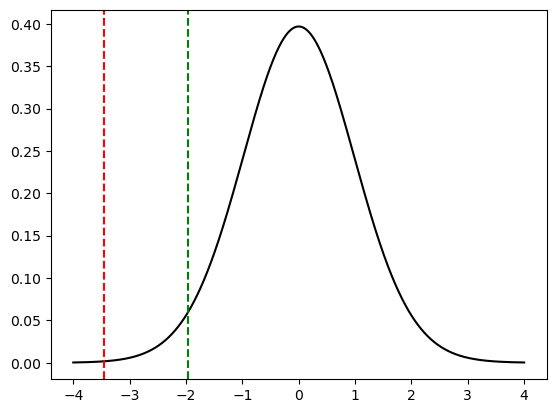

In [16]:
#Διάγραμμα απόρριψης 

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['TTR']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

h0value =  0.62984
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = -1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (h0value-m)/se
print("t-statistic:", t)
print()


if t < t_crit:
    print("can reject H0")
else:
    print("cannot reject H0, so we accept HA")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 7.1622479000000006
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: 7.545865163662049e-06

cannot reject H0


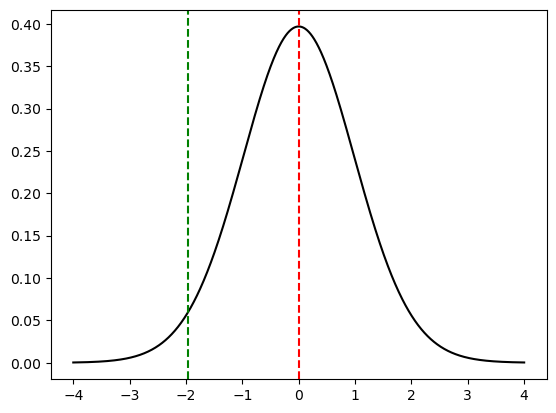

In [17]:

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['Entropy']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

h0value = 7.162248
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = -1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (h0value-m)/se
print("t-statistic:", t)
print()


if t<t_crit:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 7.1622479000000006
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: 7.545865163662049e-06

cannot reject H0


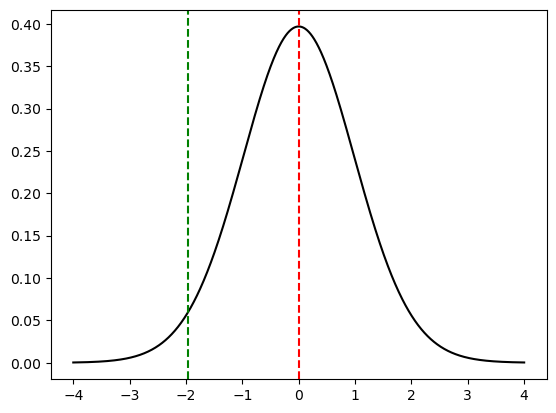

In [18]:

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['Entropy']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

h0value = 7.162248	
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = -1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (h0value-m)/se
print("t-statistic:", t)
print()


if t<t_crit:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 7.1622479000000006
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: -2.1609773328376924

can reject H0


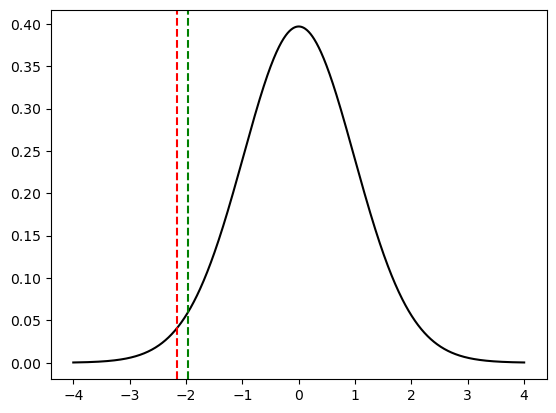

In [19]:
#Διάγραμμα απόρριψης
x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['Entropy']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

h0value = 7.13361	
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = -1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (h0value-m)/se
print("t-statistic:", t)
print()


if t<t_crit:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 5.00448824
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: 1.0283545995804158e-05

cannot reject H0


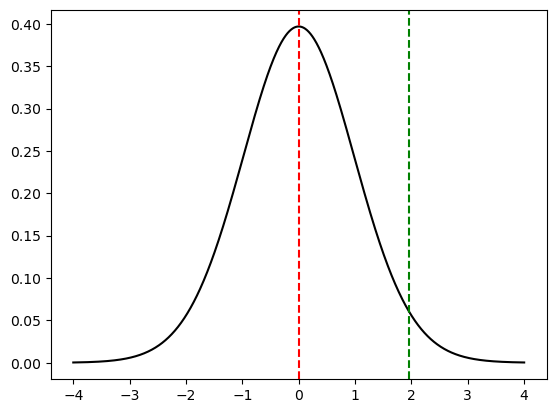

In [20]:

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['Average Tokens Length']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

#H1: μ > h0value one-tail, right-tail t-test
h0value = 5.004488
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = 1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (m-h0value)/se
print("t-statistic:", t)
print()


if t_crit<t:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 5.00448824
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: -1.0283545995804158e-05

cannot reject H0


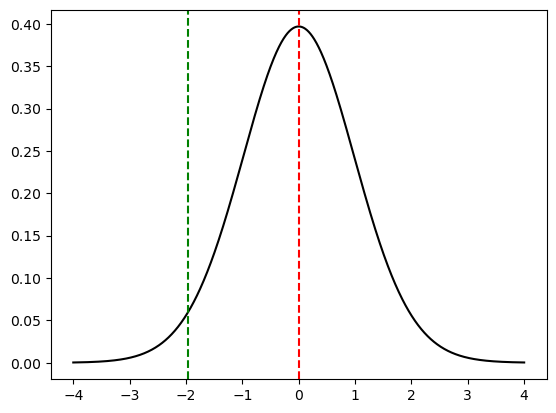

In [21]:

x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['Average Tokens Length']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

h0value = 5.004488
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = -1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (h0value-m)/se
print("t-statistic:", t)
print()


if t<t_crit:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

sample mean:	 5.00448824
sample size: 50
d.o.f.: 49
alpha: 0.05
t-statistic: 12.874538571700597

can reject H0


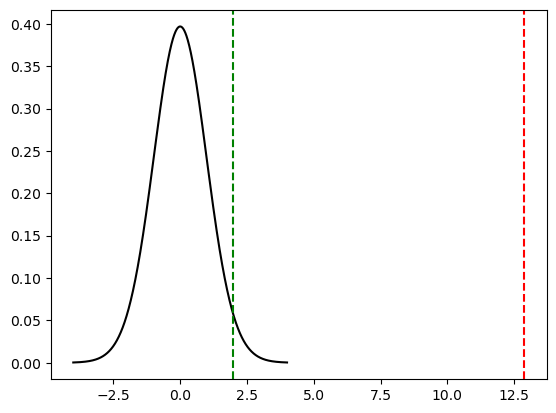

In [22]:
#Διάγραμμα απόρριψης 
x1 = np.arange(len(filtered_scores))
y1 =  filtered_scores['Average Tokens Length']
x2 = x1[0:50]
y2 = y1[0:50]

m = y2.describe().get('mean')
print("sample mean:\t", m)
sd = y2.describe().get('std')
#print("\nsample std:", sd)
print("sample size:", len(y2))

#H1: μ > h0value one-tail, right-tail t-test
h0value = 4.704019
alpha = 0.05 # Significance level 
print("d.o.f.:", len(y2)-1)
print("alpha:", alpha)
t_crit = 1.96 # found by t-Table for these values of d.o.f. , alpha and one-tailed t-test

dof = len(y2)-1
se = sd / math.sqrt(len(y2))
t = (m-h0value)/se
print("t-statistic:", t)
print()


if t_crit<t:
    print("can reject H0")
else:
    print("cannot reject H0")
    
plt.figure()
xs = np.linspace(-4,4,1000)
plt.plot(xs, st.t.pdf(xs,dof), 'k', label="T-Distribution PDF")
plt.axvline(x=t, color='r', linestyle= '--')
plt.axvline(x=t_crit, color='g', linestyle= '--')

In [23]:
other_scores = pd.read_csv("Indexes_Results.csv", sep=',', decimal=".")
other_scores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Text                   54 non-null     object 
 1   Types                  54 non-null     int64  
 2   Tokens                 54 non-null     int64  
 3   TTR                    54 non-null     float64
 4   h-Point                54 non-null     float64
 5   Entropy                54 non-null     float64
 6   Average Tokens Length  54 non-null     float64
 7   R1                     54 non-null     float64
 8   Λ (Lambda)             54 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.9+ KB


Φορτώσαμε τα αποτελέσματα της άλλης ομάδας (Ευανθία Τσιαβή, Καλλιόπη Κακαμούκα), από τα οποία αφαιρέσαμε τους outliers, όπως και στα δικά μας για να ειναι ομοιόμορφα τα αποτελέσματα.

In [24]:
other_scores


,Text,Types,Tokens,TTR,h-Point,Entropy,Average Tokens Length,R1,Λ (Lambda)
0,hatzidakis1.0,188,300,0.626667,5.666667,6.939501,5.470000,0.820185,1.643320
1,hatzidakis2.0,190,300,0.633333,5.000000,7.088677,5.500000,0.868333,1.706598
2,hatzidakis3.0,184,300,0.613333,6.000000,7.037806,5.206667,0.870000,1.593299
3,hatzidakis4.0,185,300,0.616667,7.000000,6.973635,5.386667,0.835000,1.674142
4,hatzidakis5.0,195,300,0.650000,5.666667,7.058996,5.363333,0.853519,1.767727
5,hatzidakis6.0,197,300,0.656667,5.000000,7.211183,5.233333,0.885000,1.706599
6,hatzidakis7.0,186,300,0.620000,6.500000,7.116955,4.946667,0.897083,1.572774
7,hatzidakis8.0,200,300,0.666667,6.000000,7.264022,5.496667,0.900000,1.712433
8,hatzidakis9.0,195,300,0.650000,6.000000,7.110613,5.366667,0.860000,1.707379
9,hatzidakis10.0,205,300,0.683333,6.000000,7.215156,5.733333,0.866667,1.805477


In [25]:
other_scores = other_scores.filter(regex='Text|Ent*|TTR|ngth$', axis=1)
other_scores.drop(53, axis='index', inplace=True)
print(other_scores.shape)
other_scores

(53, 4)


C:\Users\Konstantina\AppData\Local\Temp\ipykernel_2992\3102616640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_scores.drop(53, axis='index', inplace=True)


,Text,TTR,Entropy,Average Tokens Length
0,hatzidakis1.0,0.626667,6.939501,5.470000
1,hatzidakis2.0,0.633333,7.088677,5.500000
2,hatzidakis3.0,0.613333,7.037806,5.206667
3,hatzidakis4.0,0.616667,6.973635,5.386667
4,hatzidakis5.0,0.650000,7.058996,5.363333
5,hatzidakis6.0,0.656667,7.211183,5.233333
6,hatzidakis7.0,0.620000,7.116955,4.946667
7,hatzidakis8.0,0.666667,7.264022,5.496667
8,hatzidakis9.0,0.650000,7.110613,5.366667
9,hatzidakis10.0,0.683333,7.215156,5.733333


In [26]:
from scipy import stats

import numpy as np

TTR2_min = other_scores["TTR"].min() 
TTR2_max = other_scores["TTR"].max() 
TTR2_q1 = other_scores['TTR'].quantile(0.25)
TTR2_q3 = other_scores['TTR'].quantile(0.75)
TTR2_iqr = TTR2_q3 - TTR2_q1
TTR2_lower_bound = TTR2_q1 - 1.5 * TTR_iqr
TTR2_upper_bound = TTR2_q3 + 1.5 * TTR_iqr
other_scores = other_scores[(other_scores['TTR'] >= TTR2_lower_bound) & (other_scores['TTR'] <= TTR2_upper_bound)]
#print(filtered_scores)
#print(filtered_scores.shape)
outliers2 = other_scores.loc[(other_scores['TTR'] < TTR2_lower_bound) | (other_scores['TTR'] > TTR2_upper_bound)]
other_scores_with_outliers = outliers2['Text']
print(other_scores_with_outliers)


Series([], Name: Text, dtype: object)


In [27]:
Entropy2_min = other_scores["Entropy"].min() 
Entropy2_max = other_scores["Entropy"].max() 
Entropy2_q1 = other_scores['Entropy'].quantile(0.25)
Entropy2_q3 = other_scores['Entropy'].quantile(0.75)
Entropy2_iqr = Entropy2_q3 - Entropy2_q1
Entropy2_lower_bound = Entropy2_q1 - 1.5 * Entropy2_iqr
Entropy2_upper_bound = Entropy2_q3 + 1.5 * Entropy2_iqr
other_scores = other_scores[(other_scores['Entropy'] >= Entropy2_lower_bound) & (other_scores['Entropy'] <= Entropy2_upper_bound)]
print(other_scores)
print(other_scores.shape)


              Text       TTR   Entropy  Average Tokens Length
0    hatzidakis1.0  0.626667  6.939501               5.470000
1    hatzidakis2.0  0.633333  7.088677               5.500000
2    hatzidakis3.0  0.613333  7.037806               5.206667
3    hatzidakis4.0  0.616667  6.973635               5.386667
4    hatzidakis5.0  0.650000  7.058996               5.363333
5    hatzidakis6.0  0.656667  7.211183               5.233333
6    hatzidakis7.0  0.620000  7.116955               4.946667
7    hatzidakis8.0  0.666667  7.264022               5.496667
8    hatzidakis9.0  0.650000  7.110613               5.366667
9   hatzidakis10.0  0.683333  7.215156               5.733333
10  hatzidakis11.0  0.673333  7.221203               5.696667
11  hatzidakis12.0  0.656667  7.117785               5.550000
12  hatzidakis13.0  0.673333  7.280304               5.436667
13  hatzidakis14.0  0.673333  7.162841               5.676667
14  hatzidakis15.0  0.620000  6.943395               5.416667
15  hatz

In [28]:
ATL2_min = other_scores["Average Tokens Length"].min() 
ATL2_max = other_scores["Average Tokens Length"].max() 
ATL2_q1 = other_scores['Average Tokens Length'].quantile(0.25)
ATL2_q3 = other_scores['Average Tokens Length'].quantile(0.75)
ATL2_iqr = ATL2_q3 - ATL2_q1
ATL2_lower_bound = ATL2_q1 - 1.5 * ATL2_iqr
ATL2_upper_bound = ATL2_q3 + 1.5 * ATL2_iqr
other_scores = other_scores[(other_scores['Average Tokens Length'] >= ATL2_lower_bound) & (other_scores['Average Tokens Length'] <= ATL2_upper_bound)]
print(other_scores)
print(other_scores.shape)


              Text       TTR   Entropy  Average Tokens Length
0    hatzidakis1.0  0.626667  6.939501               5.470000
1    hatzidakis2.0  0.633333  7.088677               5.500000
2    hatzidakis3.0  0.613333  7.037806               5.206667
3    hatzidakis4.0  0.616667  6.973635               5.386667
4    hatzidakis5.0  0.650000  7.058996               5.363333
5    hatzidakis6.0  0.656667  7.211183               5.233333
7    hatzidakis8.0  0.666667  7.264022               5.496667
8    hatzidakis9.0  0.650000  7.110613               5.366667
9   hatzidakis10.0  0.683333  7.215156               5.733333
10  hatzidakis11.0  0.673333  7.221203               5.696667
11  hatzidakis12.0  0.656667  7.117785               5.550000
12  hatzidakis13.0  0.673333  7.280304               5.436667
13  hatzidakis14.0  0.673333  7.162841               5.676667
14  hatzidakis15.0  0.620000  6.943395               5.416667
15  hatzidakis16.0  0.673333  7.195118               5.626667
16  hatz

In [29]:
other_scores.describe(include='all')

,Text,TTR,Entropy,Average Tokens Length
count,50,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN
top,hatzidakis1.0,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,0.652467,7.136089,5.403333
std,NaN,0.028114,0.127804,0.161024
min,NaN,0.586667,6.851410,5.083333
25%,NaN,0.637500,7.043103,5.315833
50%,NaN,0.655000,7.141327,5.390000
75%,NaN,0.672500,7.227102,5.499167


In [30]:
sample1 =  filtered_scores
sample2 =  other_scores
print(sample1)
print(len(sample1))
print("-----------")
print(sample2)
print(len(sample2))


    Text       TTR   Entropy  Average Tokens Length
1    n_2  0.656667  7.196172               4.910000
2    n_3  0.630000  7.082131               4.936667
3    n_4  0.682274  7.298109               4.969900
4    n_5  0.670000  7.271903               5.346667
5    n_6  0.656667  7.123740               5.113333
..   ...       ...       ...                    ...
77  n_78  0.610000  6.916267               4.793333
78  n_79  0.683333  7.267504               5.386667
79  n_80  0.643333  7.190152               4.673333
80  n_81  0.583333  6.982434               4.796667
81  n_82  0.630000  7.054985               4.823333

[78 rows x 4 columns]
78
-----------
              Text       TTR   Entropy  Average Tokens Length
0    hatzidakis1.0  0.626667  6.939501               5.470000
1    hatzidakis2.0  0.633333  7.088677               5.500000
2    hatzidakis3.0  0.613333  7.037806               5.206667
3    hatzidakis4.0  0.616667  6.973635               5.386667
4    hatzidakis5.0  0.650000

Επειδή τα δείγματα μας είναι ανεξάρτητα και διαφορετικού μεγέθους, επιλέγουμε να κάνουμε two sample independent test για κάθε δείκτη. Το κάνουμε με την βοήθεια της μεθόδου ttest_ind(), όπου βρίσκει την p value την οποία συγκρίνουμε με το α και αν είναι μικρότερη, δεχόμαστε την μηδενική υπόθεση, δηλαδή οτι τα δείγματα μας έχουν ίση μέση τιμή (ή οι μέσες τιμές τω δύο δειγμάτων έχουν διαφορά μη στατιστικά σημαντική).

In [44]:
from scipy.stats import ttest_ind

sample1_scores_TTR = sample1['TTR'].to_numpy()  
sample2_scores_TTR = sample2['TTR'].to_numpy() #-2 Note that ttest_ind examines for equal mean values, too.

print(np.mean(sample1_scores_TTR))
print(np.mean(sample2_scores_TTR))



0.6430096538461539
0.65246664


In [45]:
tscore1, pvalue1= ttest_ind(sample1_scores, sample2_scores)
print(pvalue1)
if pvalue1 < alpha:
    print("reject H0")
else:
    print("cannot reject H0")

9.074114803947973e-26
reject H0


In [46]:
sample1_scores = sample1['Entropy'].to_numpy()  
sample2_scores = sample2['Entropy'].to_numpy() #-2 Note that ttest_ind examines for equal mean values, too.

print(np.mean(sample1_scores))
print(np.mean(sample2_scores))


7.156361371794871
7.1360890999999995


In [47]:
tscore1, pvalue1 = ttest_ind(sample1_scores, sample2_scores)
print(pvalue1)
if pvalue1< alpha:
    print("reject H0")
else:
    print("cannot reject H0")

0.3138449865694025
cannot reject H0


In [48]:
sample1_scores = sample1['Average Tokens Length'].to_numpy()  
sample2_scores = sample2['Average Tokens Length'].to_numpy() 

print(np.mean(sample1_scores))
print(np.mean(sample2_scores))

4.984018961538462
5.40333334


In [49]:
tscore1, pvalue1 = ttest_ind(sample1_scores, sample2_scores)
print(pvalue1)
if pvalue1< alpha:
    print("reject H0")
else:
    print("cannot reject H0")

9.074114803947973e-26
reject H0
